In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pubg-weapon-stats/pubg-weapon-stats.csv


# Project: pubg-weapon-stats

### Setup
For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.

### Installing Required Libraries

In [2]:
# %pip install seaborn
# %pip install folium

## Importing Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import datetime 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Load the dataset

In [4]:
try:
    url = '//kaggle/input/pubg-weapon-stats/pubg-weapon-stats.csv'
    df=pd.read_csv(url)
except FileNotFoundError:
    print("The file 'cause_of_deaths.csv' was not found.")
    exit()
df

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,Fire Mode,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
0,Groza,Assault Rifle,7.62,49,30,400.0,715.0,0.0800,4,2,612.00,"Single, Automatic, Burst",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
1,AKM,Assault Rifle,7.62,49,30,400.0,710.0,0.0100,4,2,490.00,"Single, Automatic",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
2,M762,Assault Rifle,7.62,47,30,400.0,715.0,0.0860,4,2,547.00,"Single, Automatic, Burst",46.0,32.9,28.2,21.1,110.4,77.3,66.2,49.7
3,MK47 Mutant,Assault Rifle,7.62,49,30,500.0,715.0,0.0100,4,2,490.00,"Single, Burst",49.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
4,AUG A3,Assault Rifle,5.56,43,30,600.0,880.0,0.0860,4,2,502.00,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4
5,SCAR-L,Assault Rifle,5.56,43,30,600.0,880.0,0.0960,4,2,448.00,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4
6,M416,Assault Rifle,5.56,43,30,600.0,890.0,0.0860,4,2,502.00,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4
7,M16A4,Assault Rifle,5.56,43,30,600.0,900.0,0.0100,4,2,430.00,"Single, Burst",43.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4
8,G36C,Assault Rifle,5.56,43,30,600.0,880.0,0.0860,4,2,502.00,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4
9,OBZ,Assault Rifle,5.56,43,30,600.0,880.0,0.0960,4,2,466.00,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4


## Display initial information 

In [5]:
df.head()

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,Fire Mode,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
0,Groza,Assault Rifle,7.62,49,30,400.0,715.0,0.080,4,2,612.0,"Single, Automatic, Burst",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
1,AKM,Assault Rifle,7.62,49,30,400.0,710.0,0.010,4,2,490.0,"Single, Automatic",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
2,M762,Assault Rifle,7.62,47,30,400.0,715.0,0.086,4,2,547.0,"Single, Automatic, Burst",46.0,32.9,28.2,21.1,110.4,77.3,66.2,49.7
3,MK47 Mutant,Assault Rifle,7.62,49,30,500.0,715.0,0.010,4,2,490.0,"Single, Burst",49.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
4,AUG A3,Assault Rifle,5.56,43,30,600.0,880.0,0.086,4,2,502.0,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4


In [6]:
df.tail(5)

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,Fire Mode,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
39,Pan,Melee,NaN,80,1,NaN,NaN,0.75,3,1,107.0,Single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,Crowbar,Melee,NaN,60,1,NaN,NaN,0.75,3,2,80.0,Single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,Sickle,Melee,NaN,60,1,NaN,NaN,0.75,3,2,80.0,Single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,Machete,Melee,NaN,60,1,NaN,NaN,0.75,3,2,80.0,Single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,Punch,Melee,NaN,18,1,NaN,NaN,0.33,10,4,55.0,Single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(44, 20)

## Data Cleaning & Processing: To clean and organize the dataset, you can use Python libraries such as Pandas and NumPy. Here are some steps you can follow:

### 1- Handle missing values: Use Pandas to identify and handle missing values in the dataset.

In [8]:
df.isnull().sum()

Weapon Name              0
Weapon Type              0
Bullet Type              6
Damage                   0
Magazine Capacity        0
Range                    6
Bullet Speed             8
Rate of Fire             0
Shots to Kill (Chest)    0
Shots to Kill (Head)     0
Damage Per Second        0
Fire Mode                0
BDMG_0                   7
BDMG_1                   7
BDMG_2                   7
BDMG_3                   7
HDMG_0                   7
HDMG_1                   7
HDMG_2                   7
HDMG_3                   7
dtype: int64

In [9]:
# Calculate percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_percentage

Weapon Name               0.000000
Weapon Type               0.000000
Bullet Type              13.636364
Damage                    0.000000
Magazine Capacity         0.000000
Range                    13.636364
Bullet Speed             18.181818
Rate of Fire              0.000000
Shots to Kill (Chest)     0.000000
Shots to Kill (Head)      0.000000
Damage Per Second         0.000000
Fire Mode                 0.000000
BDMG_0                   15.909091
BDMG_1                   15.909091
BDMG_2                   15.909091
BDMG_3                   15.909091
HDMG_0                   15.909091
HDMG_1                   15.909091
HDMG_2                   15.909091
HDMG_3                   15.909091
dtype: float64

In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

Weapon Name              0
Weapon Type              0
Bullet Type              0
Damage                   0
Magazine Capacity        0
Range                    0
Bullet Speed             0
Rate of Fire             0
Shots to Kill (Chest)    0
Shots to Kill (Head)     0
Damage Per Second        0
Fire Mode                0
BDMG_0                   0
BDMG_1                   0
BDMG_2                   0
BDMG_3                   0
HDMG_0                   0
HDMG_1                   0
HDMG_2                   0
HDMG_3                   0
dtype: int64

In [12]:
# check what every column have
for col in df.columns:
    print( col,':', df[col].nunique())
    print(df[col].value_counts().nlargest(5))
    print('\n' + '*' * 20 + '\n')

Weapon Name : 35
Weapon Name
Groza    1
VSS      1
S12K     1
MK14     1
SLR      1
Name: count, dtype: int64

********************

Weapon Type : 7
Weapon Type
Assault Rifle              10
Submachine Gun              6
Designed Marksman Rifle     6
Sniper Rifle                4
Pistol                      4
Name: count, dtype: int64

********************

Bullet Type : 6
Bullet Type
7.62     11
5.56      9
9.00      7
0.45      4
12.00     3
Name: count, dtype: int64

********************

Damage : 25
Damage
43     6
49     3
35     2
41     2
216    2
Name: count, dtype: int64

********************

Magazine Capacity : 13
Magazine Capacity
30    12
5      6
10     5
25     2
7      2
Name: count, dtype: int64

********************

Range : 10
Range
600.0    8
25.0     7
800.0    6
400.0    4
200.0    3
Name: count, dtype: int64

********************

Bullet Speed : 22
Bullet Speed
715.0    4
880.0    4
300.0    3
350.0    2
330.0    2
Name: count, dtype: int64

********************


In [13]:
df.describe()

,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.00000,35.000000,35.000000,35.000000
mean,6.713143,61.885714,22.200000,435.000000,621.942857,0.268614,3.742857,2.142857,449.671714,65.857143,46.397143,39.717143,29.782857,123.00000,86.085714,73.760000,55.314286
std,3.160002,48.552441,18.665476,289.218013,257.478262,0.514692,1.521278,0.772424,207.026656,56.846927,39.718758,33.911645,25.478139,65.46816,45.857555,39.292592,29.432986
min,0.300000,23.000000,2.000000,25.000000,250.000000,0.010000,1.000000,1.000000,39.000000,22.400000,15.700000,13.400000,10.100000,44.90000,31.400000,26.900000,20.200000
25%,5.560000,41.000000,8.500000,200.000000,350.000000,0.051500,3.000000,2.000000,395.500000,40.800000,29.250000,25.050000,18.750000,88.75000,62.100000,53.250000,39.900000
50%,7.620000,46.000000,20.000000,500.000000,715.000000,0.086000,4.000000,2.000000,479.000000,46.000000,32.900000,28.200000,21.100000,108.10000,75.600000,64.800000,48.600000
75%,9.000000,55.500000,30.000000,600.000000,866.500000,0.125000,4.500000,2.500000,536.000000,58.250000,40.750000,34.900000,26.200000,130.40000,91.250000,78.200000,58.650000
max,12.000000,216.000000,100.000000,900.000000,990.000000,1.900000,8.000000,4.000000,1080.000000,282.600000,198.000000,169.200000,126.900000,312.30000,218.700000,187.200000,140.400000


In [14]:
df.describe(include = 'all')

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,Fire Mode,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
count,35,35,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35,35.000000,35.000000,35.000000,35.000000,35.00000,35.000000,35.000000,35.000000
unique,35,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Groza,Assault Rifle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,6.713143,61.885714,22.200000,435.000000,621.942857,0.268614,3.742857,2.142857,449.671714,NaN,65.857143,46.397143,39.717143,29.782857,123.00000,86.085714,73.760000,55.314286
std,NaN,NaN,3.160002,48.552441,18.665476,289.218013,257.478262,0.514692,1.521278,0.772424,207.026656,NaN,56.846927,39.718758,33.911645,25.478139,65.46816,45.857555,39.292592,29.432986
min,NaN,NaN,0.300000,23.000000,2.000000,25.000000,250.000000,0.010000,1.000000,1.000000,39.000000,NaN,22.400000,15.700000,13.400000,10.100000,44.90000,31.400000,26.900000,20.200000
25%,NaN,NaN,5.560000,41.000000,8.500000,200.000000,350.000000,0.051500,3.000000,2.000000,395.500000,NaN,40.800000,29.250000,25.050000,18.750000,88.75000,62.100000,53.250000,39.900000
50%,NaN,NaN,7.620000,46.000000,20.000000,500.000000,715.000000,0.086000,4.000000,2.000000,479.000000,NaN,46.000000,32.900000,28.200000,21.100000,108.10000,75.600000,64.800000,48.600000
75%,NaN,NaN,9.000000,55.500000,30.000000,600.000000,866.500000,0.125000,4.500000,2.500000,536.000000,NaN,58.250000,40.750000,34.900000,26.200000,130.40000,91.250000,78.200000,58.650000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 0 to 36
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Weapon Name            35 non-null     object 
 1   Weapon Type            35 non-null     object 
 2   Bullet Type            35 non-null     float64
 3   Damage                 35 non-null     int64  
 4   Magazine Capacity      35 non-null     int64  
 5   Range                  35 non-null     float64
 6   Bullet Speed           35 non-null     float64
 7   Rate of Fire           35 non-null     float64
 8   Shots to Kill (Chest)  35 non-null     int64  
 9   Shots to Kill (Head)   35 non-null     int64  
 10  Damage Per Second      35 non-null     float64
 11  Fire Mode              35 non-null     object 
 12  BDMG_0                 35 non-null     float64
 13  BDMG_1                 35 non-null     float64
 14  BDMG_2                 35 non-null     float64
 15  BDMG_3       

In [16]:
print(df.duplicated().sum())

0


In [17]:
# check data type
df.dtypes

Weapon Name               object
Weapon Type               object
Bullet Type              float64
Damage                     int64
Magazine Capacity          int64
Range                    float64
Bullet Speed             float64
Rate of Fire             float64
Shots to Kill (Chest)      int64
Shots to Kill (Head)       int64
Damage Per Second        float64
Fire Mode                 object
BDMG_0                   float64
BDMG_1                   float64
BDMG_2                   float64
BDMG_3                   float64
HDMG_0                   float64
HDMG_1                   float64
HDMG_2                   float64
HDMG_3                   float64
dtype: object

In [18]:
df.columns

Index(['Weapon Name', 'Weapon Type', 'Bullet Type', 'Damage',
       'Magazine Capacity', 'Range', 'Bullet Speed', 'Rate of Fire',
       'Shots to Kill (Chest)', 'Shots to Kill (Head)', 'Damage Per Second',
       'Fire Mode', 'BDMG_0', 'BDMG_1', 'BDMG_2', 'BDMG_3', 'HDMG_0', 'HDMG_1',
       'HDMG_2', 'HDMG_3'],
      dtype='object')

In [19]:
df.head(3)

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,Fire Mode,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
0,Groza,Assault Rifle,7.62,49,30,400.0,715.0,0.080,4,2,612.0,"Single, Automatic, Burst",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
1,AKM,Assault Rifle,7.62,49,30,400.0,710.0,0.010,4,2,490.0,"Single, Automatic",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
2,M762,Assault Rifle,7.62,47,30,400.0,715.0,0.086,4,2,547.0,"Single, Automatic, Burst",46.0,32.9,28.2,21.1,110.4,77.3,66.2,49.7


## Exploratory Data Analysis(EDA)

In [20]:
sns.set_palette("husl") 
sns.set_theme(style="darkgrid")

## 1.Distribution Of Bullet Types

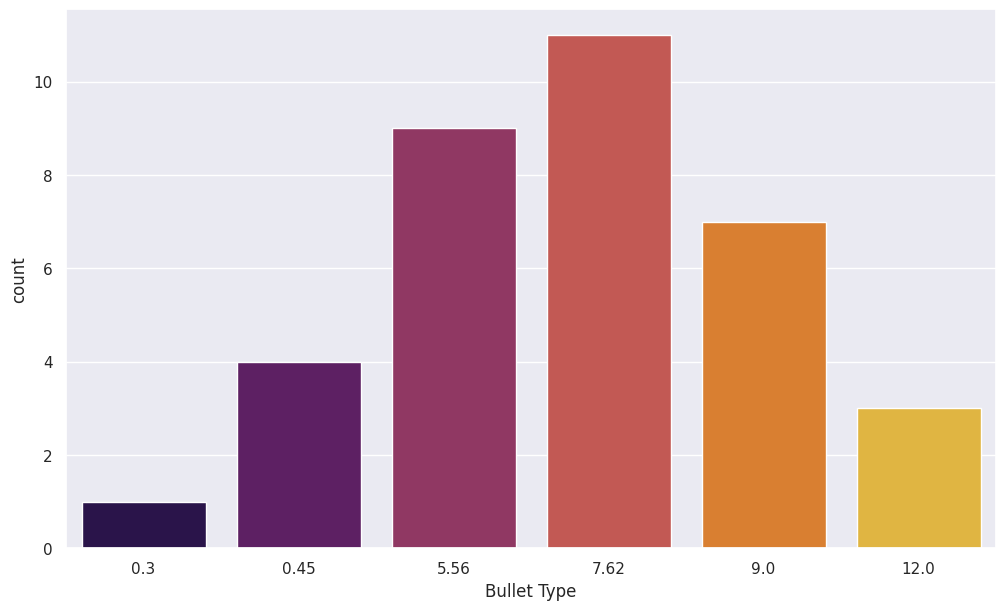

In [21]:
plt.figure(figsize=(12,7))
sns.countplot(data=df, x='Bullet Type',palette="inferno")
plt.show()

## 2.Distribution Of Weapon Types

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Assault Rifle'),
  Text(1, 0, 'Light Machine Gun'),
  Text(2, 0, 'Submachine Gun'),
  Text(3, 0, 'Shotgun'),
  Text(4, 0, 'Designed Marksman Rifle'),
  Text(5, 0, 'Sniper Rifle'),
  Text(6, 0, 'Pistol')])

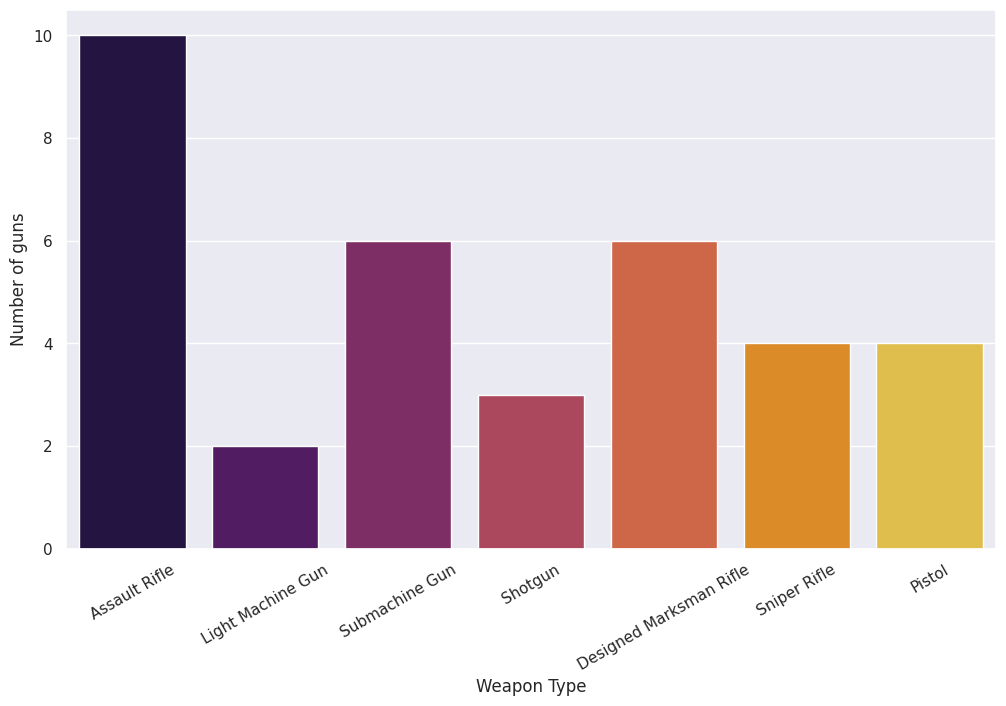

In [22]:
plt.figure(figsize=(12,7))
sns.countplot(data=df, x='Weapon Type',palette="inferno")
plt.ylabel("Number of guns")
plt.xticks(rotation=30)

## 3. Distribution Of Magaizne Capacity

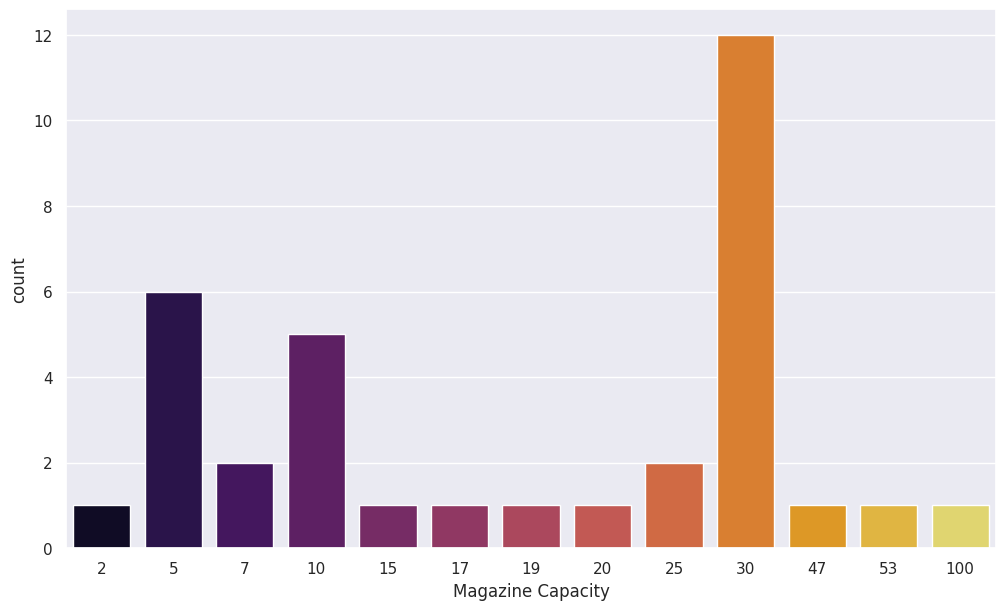

In [35]:
## magaizne capacity
plt.figure(figsize = (12,7))
sns.countplot (data=df,x='Magazine Capacity', palette="inferno")
plt.show()

## 4. Average Damage 

In [24]:
dum=df.groupby('Weapon Type')['Damage'].mean().reset_index()
dum.head()

,Weapon Type,Damage
0,Assault Rifle,45.200000
1,Designed Marksman Rifle,50.833333
2,Light Machine Gun,48.000000
3,Pistol,38.500000
4,Shotgun,210.000000


<Axes: xlabel='Damage', ylabel='Weapon Type'>

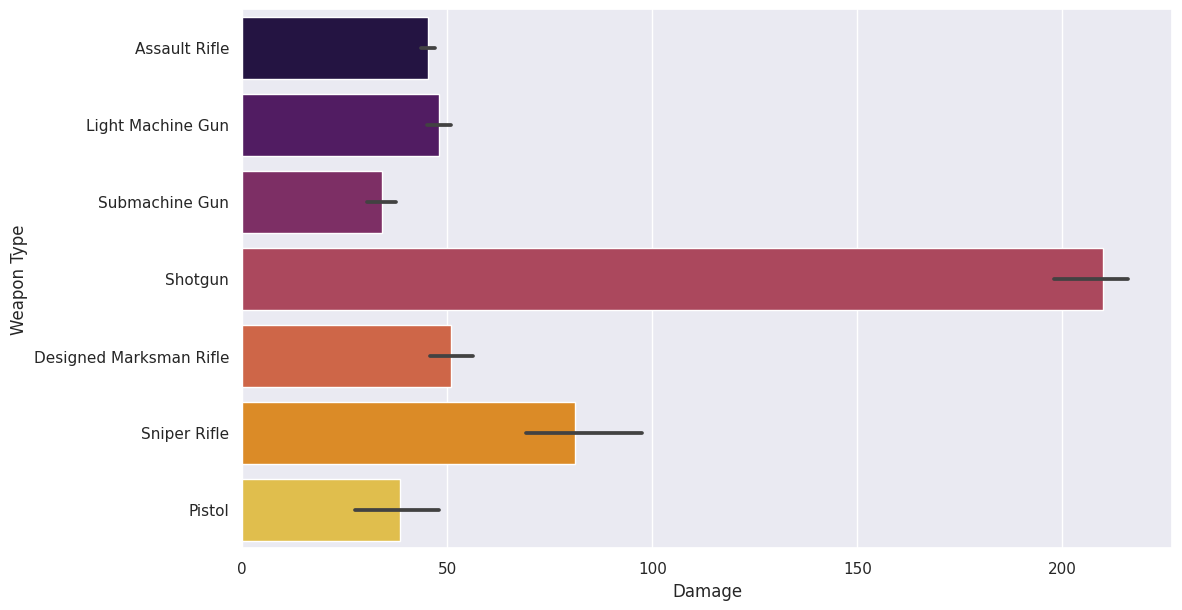

In [36]:
plt.figure(figsize = (12,7))
sns.barplot(y=df['Weapon Type'],x=df['Damage'],data=dum,palette="inferno")

## 5. Distribution Of Range

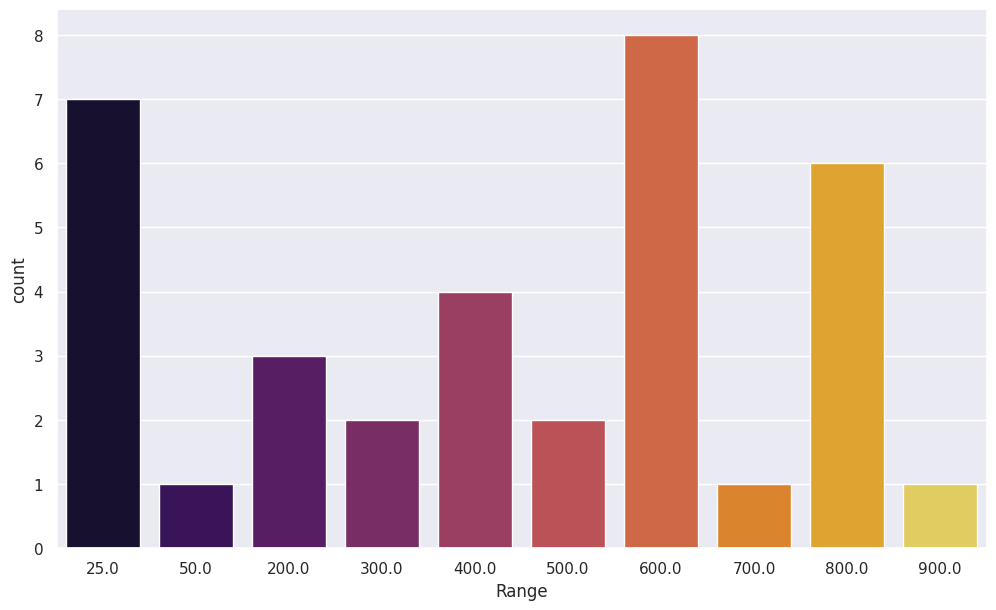

In [37]:
## range of the weapon
plt.figure(figsize = (12,7))
sns.countplot(x='Range',data=df,palette="inferno")
plt.show()

## 6. Shots to Kill (Chest)

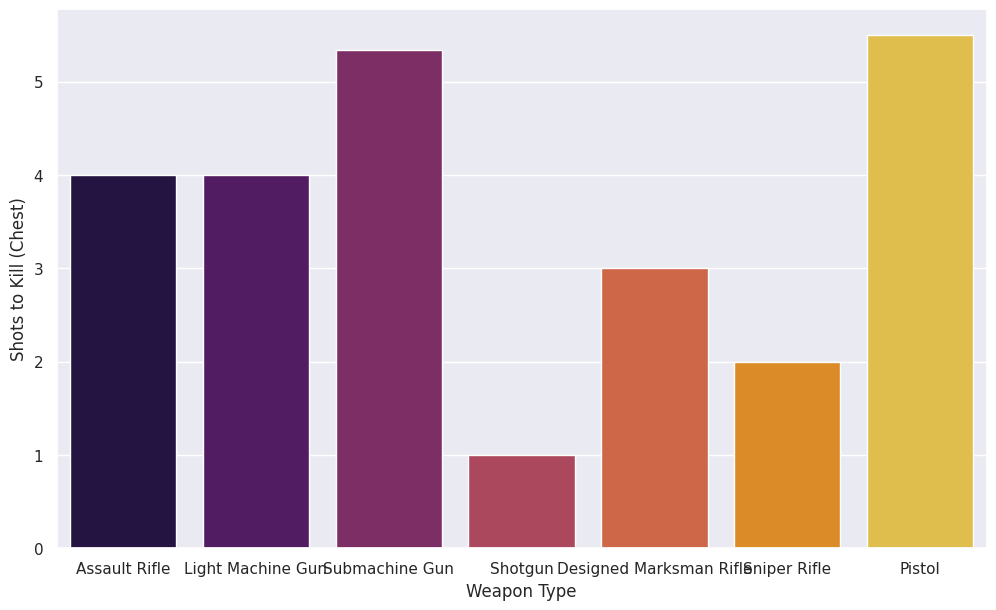

In [38]:
## inspecting shots on chest to kill
plt.figure(figsize=(12,7))
sns.barplot(y='Shots to Kill (Chest)',x='Weapon Type',data=df,palette="inferno",ci=None)
plt.show()

## 7. Bullet Speed

In [27]:
bs=df.groupby('Weapon Type')['Bullet Speed'].mean().reset_index()
bs.head()

,Weapon Type,Bullet Speed
0,Assault Rifle,816.50
1,Designed Marksman Rifle,763.00
2,Light Machine Gun,815.00
3,Pistol,333.75
4,Shotgun,360.00


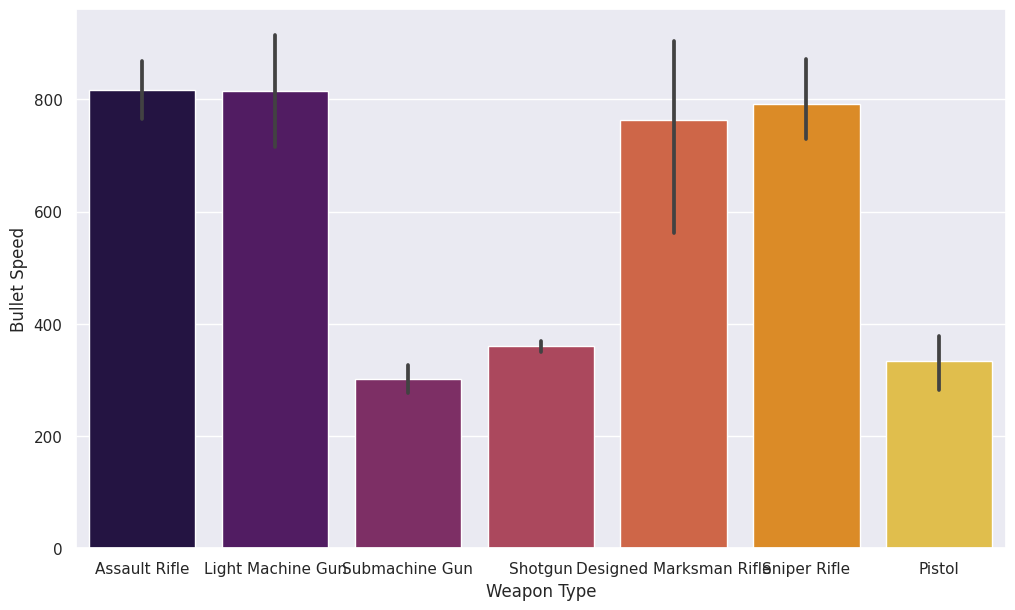

In [39]:
## inspecting the bullet speed
plt.figure(figsize = (12,7))
sns.barplot(x=df['Weapon Type'],y=df['Bullet Speed'],data=bs,palette="inferno")
plt.show()

## 8.Shots to Kill (Head)

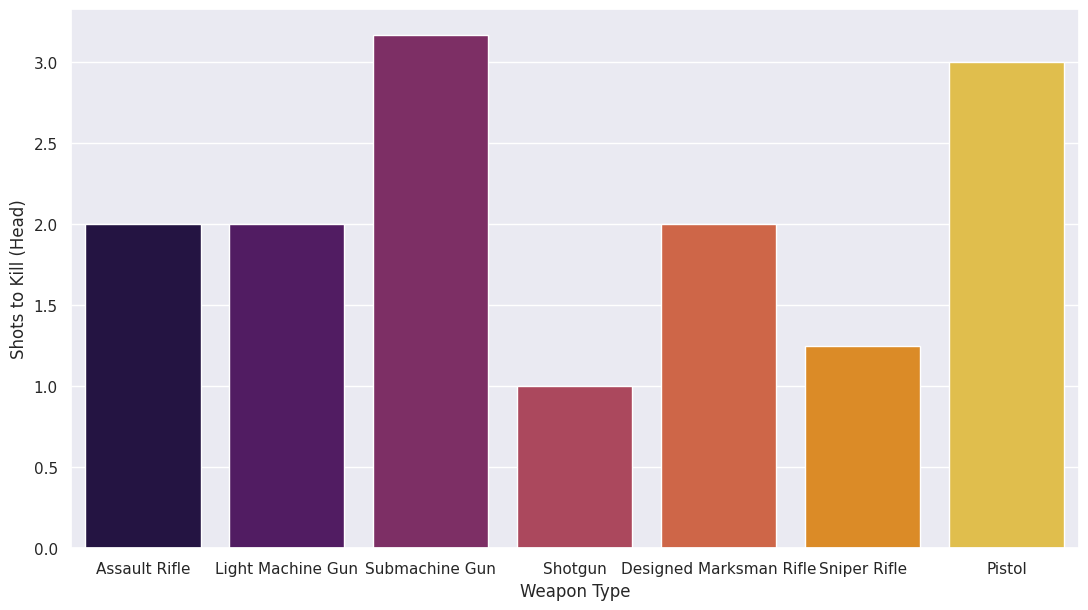

In [42]:
## inspecting shots on head to kill
plt.figure(figsize=(13,7))
sns.barplot(y=df['Shots to Kill (Head)'],x=df['Weapon Type'],data=df,palette="inferno",ci=None)
plt.show()

In [45]:
most_damaging_weapon_Assault = df[df["Weapon Type"] == "Assault Rifle"][["Damage", "Weapon Name"]].sort_values("Damage", ascending  = False)
most_damaging_weapon_Assault

,Damage,Weapon Name
0,49,Groza
1,49,AKM
3,49,MK47 Mutant
2,47,M762
4,43,AUG A3
5,43,SCAR-L
6,43,M416
7,43,M16A4
8,43,G36C
9,43,OBZ


<Axes: xlabel='Damage', ylabel='Weapon Name'>

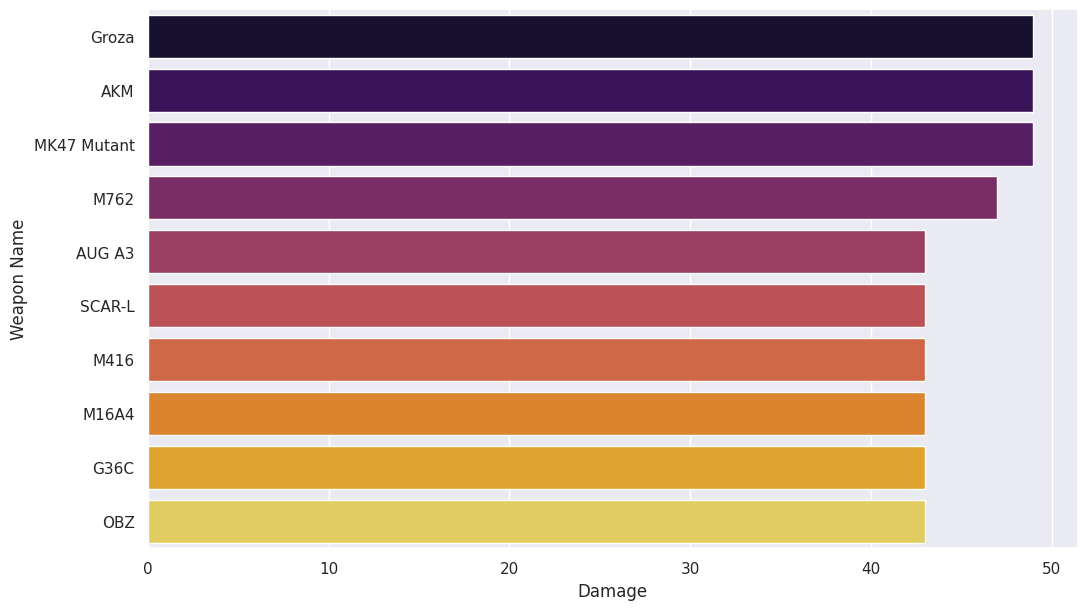

In [49]:
plt.figure(figsize = (12,7))
sns.barplot(x=most_damaging_weapon_Assault['Damage'],y=most_damaging_weapon_Assault['Weapon Name'],data=df,palette="inferno")